In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
import os
from scipy.stats import norm, skew, kurtosis
import json

In [3]:
actual_tables = [27, 48, 39, 11, 13, 12, 9, 24, 8, 17, 37, 3, 19, 15, 17, 18, 39, 39, 41, 31, 21, 5, 6, 29, 25, 24, 15, 9, 19, 35, 6, 16, 15, 14, 27, 71]
path = r"C:\PGE 2\AI CLININC\AI OPTIMIZATION FOR DATA EXTRACTION\TEST" 

In [4]:
def count_empty_lines(file_path):
    try:
        with open(file_path, 'r') as file:
            empty_line_count = 0
            for line in file:
                if line.strip() == "":
                    empty_line_count += 1
        return empty_line_count
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
        return -1


In [5]:
def count_tables_number(path):
    detected_tables = []
    for file in os.listdir(path):
        if file.endswith(".txt"):
            if ("_tables_" in file):
                txt_path = os.path.join(path, file)
                tables_detected_number = count_empty_lines(txt_path)
                detected_tables.append(tables_detected_number)

    return detected_tables


In [6]:
detected_tables = count_tables_number(path=r"C:\PGE 2\AI CLININC\AI OPTIMIZATION FOR DATA EXTRACTION\TEST")

In [7]:
def plot_error_curve(errors):
    mu, std = norm.fit(errors)
    skewness = skew(errors)
    kurt = kurtosis(errors)

    sns.displot(errors, bins=20, kde=True, label='Error Distribution')

    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, label=f'Normal Fit (μ={mu:.2f}, σ={std:.2f})')
    plt.text(xmax, ymax-3, f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}',
             verticalalignment='top', horizontalalignment='right', fontsize=10)

    plt.xlabel('Errors')
    plt.ylabel('Density')
    plt.title('Error Distribution and Normal Fit')
    plt.legend()
    plt.show()

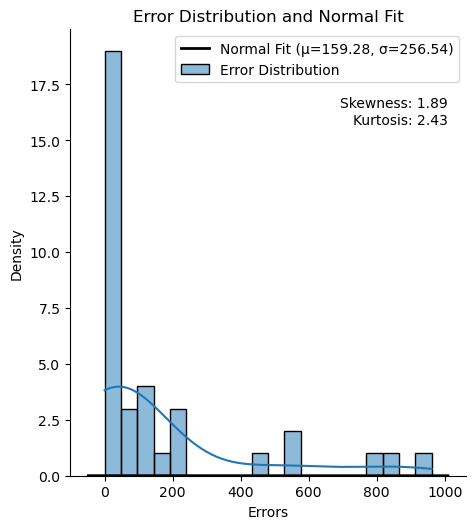

In [8]:
errors =  [(detected - actual) ** 2 for detected, actual in zip(detected_tables, actual_tables)] 
plot_error_curve(errors)

In [72]:
mean_mse = sum(errors) / len(errors)
var_mse = np.var(errors)
normalized_mse = mean_mse/var_mse
print(f"The method extract tables with {(normalized_mse*100):.2f}% of errors")

The method extract tables with 0.24% of errors


In [10]:
# Data records 
def count_data_records(path):
    num_processed_pdf = 0
    for file in os.listdir(path):
        if file.endswith(".txt"):
            if ("_tables_" not in file):
                num_processed_pdf += 1
    return num_processed_pdf

num_processed_pdf = count_data_records(path=r"C:\PGE 2\AI CLININC\AI OPTIMIZATION FOR DATA EXTRACTION\TEST")

In [11]:

def count_table_in_json_keys(path):
    json_tables_count = []
    for json_file in os.listdir(path):
        if json_file.endswith(".json"): 
            try:
                with open(json_file, 'r') as file:
                    data = json.load(file)
                    table_count = 0
                    for key in data.keys():
                        if 'table' in key.lower():
                            table_count += 1
                json_tables_count.append(table_count)

            except FileNotFoundError:
                print(f"File '{json_file}' not found.")
                return json_tables_count.append(-1) 
    return json_tables_count



In [12]:
data_records = {"text" : num_processed_pdf, "tables": num_processed_pdf, "json": len(count_table_in_json_keys(path))}

In [13]:

def plot_histogram(data, fixed_value):
    labels = list(data.keys())
    values = list(data.values())
    percentages = [value / fixed_value * 100 for value in values]
    bar_width = 0.3
    colors = sns.color_palette("pastel")
    ax = sns.barplot(x=labels, y=percentages, palette=colors, linewidth=2.5, edgecolor=".2", saturation=0.75, width=bar_width)
    
    for i, value in enumerate(values):
        ax.text(i, percentages[i] + 0.5, f'{percentages[i]:.2f}%', ha='center', va='bottom', fontsize=10)
    
    plt.xlabel('Keys')
    plt.ylabel('Percentage')
    plt.title('Histogram of Data Records (Relative to Fixed Value)')
    plt.xticks(rotation=45) 
    plt.show()


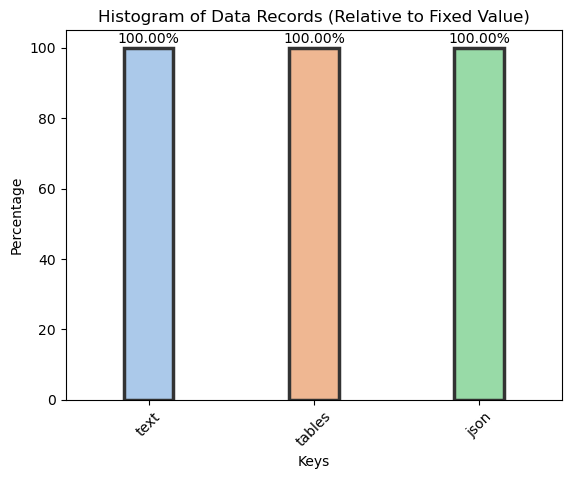

In [14]:
plot_histogram(data_records, fixed_value=len(actual_tables))

## Tables similarity 

In [15]:
def process_text_files(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        if filename.endswith('.txt'):
            if ("_tables_" in filename):
                with open(os.path.join(input_folder, filename), 'r') as file:
                    html_content = ''
                    for line in file:
                        html_content += line.strip()

                subfolder = os.path.join(output_folder, os.path.splitext(filename)[0])
                os.makedirs(subfolder, exist_ok=True)

                html_filename = os.path.join(subfolder, 'output.html')
                with open(html_filename, 'w') as html_file:
                    html_file.write(html_content)


In [16]:
input_folder = path
output_folder = 'html_folder' 
process_text_files(input_folder, output_folder)

In [17]:
# Four Similarity class 
# class 0 : little similiraty (0% to 25%)
# class 1 : middle similarity (26% to 50%)
# class 2 : middle-high similarity (51% to 75%)
# class 3 : high similarity  (75% to 100%)

In [18]:
range_similarity = [(0, 0.25*i, 0.50*i, 0.75*i, i) for i in actual_tables]
range_similarity

[(0, 6.75, 13.5, 20.25, 27),
 (0, 12.0, 24.0, 36.0, 48),
 (0, 9.75, 19.5, 29.25, 39),
 (0, 2.75, 5.5, 8.25, 11),
 (0, 3.25, 6.5, 9.75, 13),
 (0, 3.0, 6.0, 9.0, 12),
 (0, 2.25, 4.5, 6.75, 9),
 (0, 6.0, 12.0, 18.0, 24),
 (0, 2.0, 4.0, 6.0, 8),
 (0, 4.25, 8.5, 12.75, 17),
 (0, 9.25, 18.5, 27.75, 37),
 (0, 0.75, 1.5, 2.25, 3),
 (0, 4.75, 9.5, 14.25, 19),
 (0, 3.75, 7.5, 11.25, 15),
 (0, 4.25, 8.5, 12.75, 17),
 (0, 4.5, 9.0, 13.5, 18),
 (0, 9.75, 19.5, 29.25, 39),
 (0, 9.75, 19.5, 29.25, 39),
 (0, 10.25, 20.5, 30.75, 41),
 (0, 7.75, 15.5, 23.25, 31),
 (0, 5.25, 10.5, 15.75, 21),
 (0, 1.25, 2.5, 3.75, 5),
 (0, 1.5, 3.0, 4.5, 6),
 (0, 7.25, 14.5, 21.75, 29),
 (0, 6.25, 12.5, 18.75, 25),
 (0, 6.0, 12.0, 18.0, 24),
 (0, 3.75, 7.5, 11.25, 15),
 (0, 2.25, 4.5, 6.75, 9),
 (0, 4.75, 9.5, 14.25, 19),
 (0, 8.75, 17.5, 26.25, 35),
 (0, 1.5, 3.0, 4.5, 6),
 (0, 4.0, 8.0, 12.0, 16),
 (0, 3.75, 7.5, 11.25, 15),
 (0, 3.5, 7.0, 10.5, 14),
 (0, 6.75, 13.5, 20.25, 27),
 (0, 17.75, 35.5, 53.25, 71)]

In [19]:
similarity = [1, 3, 2, 3, 1, 3, 3, 2, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3,3, 3, 3, 3, 3, 0, 2, 1, 1, 2, 1, 2, 0, 3, 2]

In [34]:
similarity_dict = {}

for i in range(len(list(set(similarity)))):
    similarity_dict[f"Similarity Class {i}"] = len([j for j in similarity if j == i])

similarity_dict

{'Similarity Class 0': 2,
 'Similarity Class 1': 8,
 'Similarity Class 2': 7,
 'Similarity Class 3': 20}

In [37]:

def plot_similarity_histogram(data, fixed_value):
    labels = list(data.keys())
    values = list(data.values())
    percentages = [value / fixed_value * 100 for value in values]
    bar_width = 0.3
    colors = sns.color_palette("pastel")
    ax = sns.barplot(x=labels, y=percentages, palette=colors, linewidth=2.5, edgecolor=".2", saturation=0.75, width=bar_width)
    
    for i, value in enumerate(values):
        ax.text(i, percentages[i] + 0.5, f'{percentages[i]:.2f}%', ha='center', va='bottom', fontsize=10)
    
    plt.xlabel('Keys')
    plt.ylabel('Percentage')
    plt.title('Histogram of Similarity Class')
    plt.xticks(rotation=45) 
    plt.show()


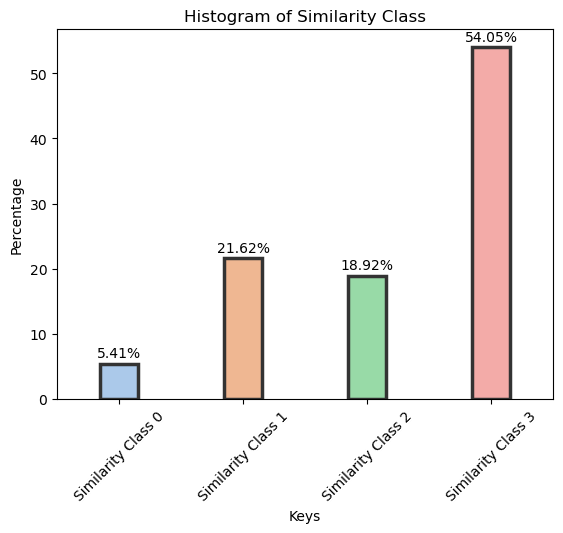

In [38]:
plot_similarity_histogram(data=similarity_dict, fixed_value=len(similarity))

In [47]:
global_similarity_score = 0

for i, value in enumerate(similarity):
    global_similarity_score += value

global_similarity_score /= len(similarity)
print("global similarity score : {}".format(f"{global_similarity_score:.2f}"))

global similarity score : 2.22


In [81]:
np.linspace(start=2, stop=3, num=24)

array([2.        , 2.04347826, 2.08695652, 2.13043478, 2.17391304,
       2.2173913 , 2.26086957, 2.30434783, 2.34782609, 2.39130435,
       2.43478261, 2.47826087, 2.52173913, 2.56521739, 2.60869565,
       2.65217391, 2.69565217, 2.73913043, 2.7826087 , 2.82608696,
       2.86956522, 2.91304348, 2.95652174, 3.        ])

In [82]:
global_similarity_score = 56

In [73]:
normalized_mse = normalized_mse*100
print(f"Errors in table detection : {(normalized_mse):.2f}% of errors")

Errors in table detection : 0.24% of errors


In [83]:
text_data_record = 100
tables_data_record = 100
json_data_record = 100

## SUPER METRIC

In [87]:
def super_metric(metric_dict : dict):
    SM = 0
    for metric_name in list(metric_dict.keys()):
        metric_value, coef = metric_dict[metric_name]
        SM += metric_value*coef

    return SM

In [88]:
metric_dict = {"text_data_record" : [text_data_record, 0.05], "tables_data_record" : [tables_data_record, 0.1], "json_data_record" : [json_data_record, 0.15], "similarity_score" : [global_similarity_score, 0.5], "table_detection_error" : [normalized_mse, 0.2]}


In [89]:
super_metric(metric_dict)

58.048402252487726